### Seoul Bike 🚴🏿‍♀️ | Feature Engineering & Regression Model

![](https://raw.githubusercontent.com/MhmdSyd/needed_image/main/iti-kaggle.jpg)

**This notebook explains how we can go about explore and prepare data for model building.**

*The notebook is structured in the following way:*

- About Dataset.
- Data Summary.
- Feature Engineering.
- Model:
    - CatBoost Model.
    - XGBoost Model.
    - Grediant Boost Model.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<span style='padding: 10px; font-family:Helvetica; font-size:30px' > About Dataset </span>
</div>

## Data Feature

- **Date** : datetime(day/month/year).
- **y** : target feature.
- **Hour** : hour of datetime.
- **Temperature(°C)** : temperature in Celsius.
- **Humidity(%)** : relative humidity.
- **Wind speed (m/s)** : wind speed.
- **Visibility (10m)** : visibility range.
- **Dew point temperature(�C)** : temperature of the air (at constant pressure).
- **Solar Radiation (MJ/m2)** : the total solar energy for a day.
- **Rainfall(mm)** : represents the total depth of rainwater (mm), during 24 hours.
- **Snowfall (cm)** : the amount of snow that falls in a given area or period of time.
- **Seasons** : (Winter,Spring, Autumn, Summer).
- **Holiday** : that day is holiday or not.
- **Functioning Day** : working day or close.

**Import Needed Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import missingno as msno

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import  Lasso
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor 
import xgboost as xgb

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv("../input/seoul-bike-rental-ai-pro-iti/train.csv",index_col="ID")

In [4]:
df_test = pd.read_csv("../input/seoul-bike-rental-ai-pro-iti/test.csv",index_col="ID")


## Data Summary

In [5]:
df_train.shape

(5760, 14)

In [6]:
df_train.head(3)

,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df_train.dtypes

Date                          object
y                              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5760 non-null   object 
 1   y                          5760 non-null   int64  
 2   Hour                       5760 non-null   int64  
 3   Temperature(�C)            5760 non-null   float64
 4   Humidity(%)                5760 non-null   int64  
 5   Wind speed (m/s)           5760 non-null   float64
 6   Visibility (10m)           5760 non-null   int64  
 7   Dew point temperature(�C)  5760 non-null   float64
 8   Solar Radiation (MJ/m2)    5760 non-null   float64
 9   Rainfall(mm)               5760 non-null   float64
 10  Snowfall (cm)              5760 non-null   float64
 11  Seasons                    5760 non-null   object 
 12  Holiday                    5760 non-null   object 
 13  Functioning Day            5760 non-null   objec

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<span style='padding: 10px; font-family:Helvetica; font-size:30px' > Data Preparation </span>
</div>

## Feature Engineering

In [9]:
df_train.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*df_train.columns]]
df_test.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*df_test.columns]]
df_train.columns

Index(['Date', 'Y', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [10]:
df_train.Date = pd.to_datetime(df_train.Date, format="%d/%m/%Y")
df_test.Date = pd.to_datetime(df_test.Date, format="%d/%m/%Y")
df_train.Date.dtype

dtype('<M8[ns]')

In [11]:
df_train.insert(1,"Day", df_train.Date.dt.day)
df_train.insert(2, "Month", df_train.Date.dt.month)
df_train.insert(3, "Year", df_train.Date.dt.year)

In [12]:
df_test.insert(1,"Day", df_test.Date.dt.day)
df_test.insert(2, "Month", df_test.Date.dt.month)
df_test.insert(3, "Year", df_test.Date.dt.year)

In [13]:
df_train.insert(3, 'WeekDay',df_train["Date"].dt.day_name())
df_test.insert(3, 'WeekDay', df_test["Date"].dt.day_name())

In [14]:
df_train.Holiday.replace(['Holiday','No Holiday'], [0,1], inplace=True)
df_test.Holiday.replace(['Holiday','No Holiday'], [0,1], inplace=True)

In [15]:
df_train.Functioning_Day = df_train.Functioning_Day.map({"No":0, "Yes":1})
df_test.Functioning_Day = df_test.Functioning_Day.map({"No":0, "Yes":1})

In [16]:
df_train.Year = df_train.Year.map({2017:0, 2018:1})
df_test.Year = df_test.Year.map({2017:0, 2018:1})

In [17]:
df_train.Seasons = df_train.Seasons.map({"Winter":1, 'Autumn':2, 'Spring':3, 'Summer':4})
df_test.Seasons = df_test.Seasons.map({"Winter":1, 'Autumn':2, 'Spring':3, 'Summer':4})

In [18]:
df_train.insert(2, 'label_day_night', df_train['Hour'].apply(lambda x : 0 if (x<7) else( 1)))
df_test.insert(2, 'label_day_night', df_test['Hour'].apply(lambda x : 0 if (x<7) else( 1)))

In [19]:
df_train["Working_Day"] = 1
df_train.loc[(df_train.WeekDay=="Saturday")|(df_train.WeekDay=="Sunday"), "Working_Day"] = 0

df_test["Working_Day"] = 1
df_test.loc[(df_test.WeekDay=="Saturday")|(df_test.WeekDay=="Sunday"), "Working_Day"] = 0

In [20]:
df_train.Humidity[df_train.Humidity==0] = df_train.Humidity.mean()
df_test.Humidity[df_test.Humidity==0] = df_test.Humidity.mean()

In [21]:
categoryVariableList = ["WeekDay"]
for var in categoryVariableList:
    df_train[var] = df_train[var].astype("category")
    df_test[var] = df_test[var].astype("category")

In [22]:
for col in categoryVariableList:
    train_dummies_col = pd.get_dummies(df_train[col])
    test_dummies_col = pd.get_dummies(df_test[col])
    
    df_train = pd.concat([df_train, train_dummies_col],axis=1)
    df_test = pd.concat([df_test, test_dummies_col],axis=1)
    
    df_train.drop(col, axis=1, inplace=True)
    df_test.drop(col, axis=1, inplace=True)

In [23]:
df_train.columns

Index(['Date', 'Day', 'label_day_night', 'Month', 'Year', 'Y', 'Hour',
       'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Working_Day', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [24]:
columns = df_train.columns.tolist()
columns.append(columns.pop(5))
df_train = df_train[columns]

In [25]:
df_train.drop("Date",axis=1, inplace=True)
df_test.drop("Date",axis=1, inplace=True)

In [26]:
numerical_feature = ["Temperature","Humidity","Rainfall",
                     "Visibility","Dew_Point_Temperature",
                     'Wind_Speed','Solar_Radiation',"Snowfall"]

scale = StandardScaler()
df_train[numerical_feature] = scale.fit_transform(df_train[numerical_feature])
df_test[numerical_feature] = scale.transform(df_test[numerical_feature])

## Feature Selection

In [27]:
lr = Lasso(alpha=0.1, normalize=True)
lr.fit(df_train.drop(['Y'], axis=1), df_train.Y)
[*zip(df_train.columns[:-1], lr.coef_)]

[('Day', 0.0),
 ('label_day_night', 334.6193639208106),
 ('Month', 30.992348692083905),
 ('Year', 278.4497325424134),
 ('Hour', 10.144521219776577),
 ('Temperature', 300.0545649644535),
 ('Humidity', -148.9167863654535),
 ('Wind_Speed', 10.809961592874926),
 ('Visibility', 17.155293174865843),
 ('Dew_Point_Temperature', 0.0),
 ('Solar_Radiation', -104.25112418510713),
 ('Rainfall', -58.78994791977814),
 ('Snowfall', -0.0),
 ('Seasons', 38.192632245534185),
 ('Holiday', 76.42616625347353),
 ('Functioning_Day', 837.8111149709567),
 ('Working_Day', 26.198670172894566),
 ('Friday', 19.9619302888025),
 ('Monday', -0.0),
 ('Saturday', -0.0),
 ('Sunday', -38.763299263775686),
 ('Thursday', -12.896050534252792),
 ('Tuesday', 21.73285883988257),
 ('Wednesday', 18.753620845746667)]

In [28]:
useful_features = set(df_train.columns).difference(["Day","Snowfall",
                                                    "Dew_Point_Temperature",
                                                    "Monday","Saturday","Y"])

In [29]:
# loss function
def RMSLE(y_acual, y_pred):
    return np.sqrt(mean_squared_log_error(y_acual, y_pred))

**Train Validation Split**

In [30]:
X_train, X_val, y_train, y_val = train_test_split(df_train[useful_features],
                                                  df_train.Y,
                                                  test_size=0.2,
                                                  random_state=2)

X_test = df_test[useful_features]

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<span style='padding: 10px; font-family:Helvetica; font-size:30px' > Modeling </span>
</div>

## CatBoost

In [31]:
catBoost = CatBoostRegressor(objective='Poisson',
                             loss_function=RMSLE,
                             n_estimators=10000,
                             random_state=0,
                             learning_rate=0.03,
                             subsample=0.75,
                             max_depth=5,
                             verbose=0)

catBoost.fit(X_train,y_train)

y_pred = [int(i) for i in catBoost.predict(X_train)]

rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred))
rmsle_val = np.sqrt(mean_squared_log_error(y_val, catBoost.predict(X_val)))

print("RMSLE Trian ====> ",round(rmsle_train,6))
print('='*30)
print("RMSLE Validation ====> ",round(rmsle_val,6))

RMSLE Trian ====>  0.120193
RMSLE Validation ====>  0.328544


In [32]:
catBoost_pred = [int(i) for i in catBoost.predict(X_test)]

## XGBoost

In [33]:
xg_reg = xgb.XGBRegressor(objective='count:poisson',
                          random_state=0,
                          loss_function=RMSLE,
                          colsample_bytree = 0.6, 
                          learning_rate = 0.02,
                          gamma = 4,
                          n_estimators = 10000,
                          max_depth=4 ,
                          subsample=0.75,
                          min_child_weight=6)

xg_reg = xg_reg.fit(X_train,y_train)

y_pred = [int(i) for i in xg_reg.predict(X_train)]

rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred))
rmsle_val = np.sqrt(mean_squared_log_error(y_val, xg_reg.predict(X_val)))

print("RMSLE Train =====> %f" % (round(rmsle_train,6)))
print('='*30)
print("RMSLE Validation ====> %f"%(round(rmsle_val,6)))

RMSLE Train =====> 0.158352
RMSLE Validation ====> 0.330620


In [34]:
print("Train Score = ",round(r2_score(y_pred, y_train)*100,2),"%")

Train Score =  99.42 %


R-squared for train data 0.9942925650044344


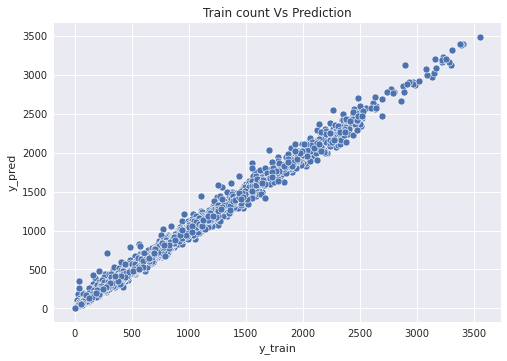

In [35]:
plt.style.use('seaborn')
y_pred = xg_reg.predict(X_train)
print("R-squared for train data",xg_reg.score(X_train, y_train))
sns.scatterplot(y_train, y_pred)
plt.title('Train count Vs Prediction')
plt.xlabel("y_train")
plt.ylabel("y_pred")
plt.show()

In [36]:
xgb_pred = [int(i) for i in xg_reg.predict(X_test)]

## GBoost

In [37]:
useful_features = set(df_train.columns).difference(["Day","Snowfall",
                                                    "Dew_Point_Temperature",
                                                    "Friday","Summer","Y"])

In [38]:
X_train, X_val, y_train, y_val = train_test_split(df_train[useful_features],
                                                  df_train.Y,
                                                  test_size=0.2,
                                                  random_state=53)

X_test = df_test[useful_features]
y_train_log = np.log1p(y_train)

In [39]:
params = {'n_estimators': 240,
          'max_depth': 4,
          'random_state': 41,
          'min_samples_leaf': 6,
          'learning_rate': 0.1,
          'subsample': 0.75,
          'loss': 'ls'}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train_log)
val_pred = np.sqrt(mean_squared_log_error(y_val, np.exp(reg.predict(X_val))))
print("RMSLE Validation ====> ", val_pred)

RMSLE Validation ====>  0.34194343497141866


In [40]:
gboost_pred = [int(i) for i in np.exp(reg.predict(X_test))]

**Save Prediction**

In [41]:
y_avg =(0.85*np.array(gboost_pred)+np.array(catBoost_pred)+np.array(xgb_pred))/3

In [42]:
url = '../input/seoul-bike-rental-ai-pro-iti/sample_submission.csv'
sample_submission = pd.read_csv(url,index_col='ID')
sample_submission.y = [int(i) for i in y_avg]
sample_submission.to_csv('submission.csv')

In [43]:
y_tung =(0.9*np.array(gboost_pred)+np.array(catBoost_pred))/2
sample_submission.y = [int(i) for i in y_tung]
sample_submission.to_csv('submission_temp.csv')

## Thanks For Read My NoteBook :)